# 미니프로젝트 : 가위바위보 분류기 제작

In [1]:
import tensorflow as tf
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpus[0], True)
from tensorflow import keras
from tensorflow.keras.layers import *

import numpy as np
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import os

In [2]:
img = Image.open('.\\data\\train\\paper\\0.jpg')
img = np.array(img)
img.shape

(28, 28, 3)

In [3]:
def resize_images(img_path):
    images = glob(img_path + '\\*.jpg')
    
    print(len(images))
    
    target_size = (28, 28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, 'JPEG')
        
    print(len(images), 'Images resized')

In [4]:
image_dir_path =".\\data\\train\\scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100
100 Images resized
가위 이미지 resize 완료!


In [5]:
image_dir_path =".\\data\\train\\paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100
100 Images resized
보 이미지 resize 완료!


In [6]:
image_dir_path =".\\data\\train\\rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100
100 Images resized
바위 이미지 resize 완료!


In [7]:
def load_data(img_path, number_of_data = 300):
    img_size = 28
    color = 3
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype = np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype = np.int32)
    
    idx = 0
    # 가위 : 0, 바위 : 1, 보 : 2
    for file in glob(img_path + '\\scissor\\*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 0
        idx += 1
        
    for file in glob(img_path + '\\rock\\*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 1
        idx += 1
        
    for file in glob(img_path + '\\paper\\*.jpg'):
        img = np.array(Image.open(file), dtype = np.int32)
        imgs[idx,:,:,:] = img
        labels[idx] = 2
        idx += 1
        
    print('학습데이터의 이미지 개수는 ',idx,'입니다.')
    return imgs, labels

In [23]:
img_dir_path = '.\\data\\train'
x_train, y_train = load_data(img_dir_path)
x_train_norm = x_train / 255.

학습데이터의 이미지 개수는  300 입니다.


라벨:  0


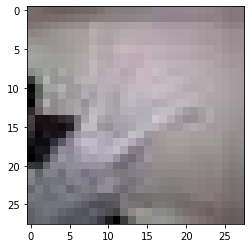

In [24]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [25]:
n_channel_1= 32
n_channel_2 = 64
n_dense = 64
n_train_epoch = 10

model = keras.models.Sequential()
model.add(Conv2D(n_channel_1, (3, 3), activation = 'relu', input_shape = (28, 28, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(n_channel_2, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(n_dense, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs = n_train_epoch)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_9 (Dense)              (None, 3)                

In [19]:
image_dir_path =".\\data\\test\\rock"
resize_images(image_dir_path)
image_dir_path =".\\data\\test\\scissor"
resize_images(image_dir_path)
image_dir_path =".\\data\\test\\paper"
resize_images(image_dir_path)


100
100 Images resized
100
100 Images resized
100
100 Images resized


In [26]:
test_dir_path = '.\\data\\test'
x_test, y_test = load_data(test_dir_path)
x_test_norm = x_test / 255.

학습데이터의 이미지 개수는  300 입니다.


In [27]:
test_loss , test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

10/10 - 0s - loss: 1.8580 - accuracy: 0.5733
test_loss : 1.858007550239563
test_accuracy : 0.5733333230018616


In [ ]:
n_channel_1= 32
n_channel_2 = 64
n_channel_3 = 128
n_dense_1 = 256
n_dense_2 = 16
n_train_epoch = 20

model = keras.models.Sequential()
model.add(Conv2D(n_channel_1, (3, 3), activation = 'relu', input_shape = (28, 28, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(n_channel_2, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(n_channel_3, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(n_dense_1, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(n_dense_2, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))

model.summary()
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_norm, y_train, epochs = n_train_epoch)

In [21]:
test_loss , test_accuracy = model.evaluate(x_test_norm, y_test, verbose = 2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

10/10 - 0s - loss: 9.9871 - accuracy: 0.3333
test_loss : 9.987105369567871
test_accuracy : 0.3333333432674408


In [22]:
test_loss , test_accuracy = model.evaluate(x_train_norm, y_train, verbose = 2)
print('test_loss : {}'.format(test_loss))
print('test_accuracy : {}'.format(test_accuracy))

10/10 - 0s - loss: 0.0121 - accuracy: 1.0000
test_loss : 0.012131466530263424
test_accuracy : 1.0
